## Исследование регистрируемой безработицы в России.

<b>Задача:</b>
Для составления аналитического обзора по проблеме безработицы в России необходимо провести исследование основных социально-демографических характеристик безработных и ситуацию в 2020 году.<br>

<b>Источник данных:</b><br>
Регистрируемая безработица в России: общие социально-демографические характеристики с детализацией до органа занятости населения // Роструд; обработка: Колесников И.В., Копыток В.К., Кузьмина Ю.В., Инфраструктура научно-исследовательских данных, АНО «ЦПУР», 2021. Доступ: открытая лицензия в исследовательских целях. Размещено: 21.10.2021. (Ссылка на набор данных: http://data-in.ru/data-catalog/datasets/180/)

<b>Описание данных:</b><br>

## <b>Задание:</b>

### <a class="anchor" id="1"></a> Загрузка данных. Предобработка

1. Загрузите файл <code>unemployed.csv</code> с разделителем <code>;</code>
2. Определите размер датасета.
3. Познакомьтесь с данными.
4. Проверьте пропуски, дубликаты и типы данных.
5. Добавьте столбцы с месяцем и годом (year, month).
6. Сформулируйте выводы.

###  <a class="anchor" id="1"></a> Исследовательский анализ данных

Все отчеты в этом разделе должны быть визуализированы. Графики должны содержать названия и подписи осей. Каждый пункт сопровидите выводами.

1. Определите динамику числа обращений в службу занятости за представленный в датасете период. Постройте линейный график. Укрупните по годам. Постройте столбчатую диаграмму. Добавьте признак повторных обращений в центры занятости населения, Постройте линейный график.
2. Определите число обращений в службу занятости по возрастным группам. Постройте столбчатую диаграмму.<br> *2.1 Детализируйте по каждому году, визуализируйте результат.
3. Определите общее число устроившихся на работу граждан, определите процент трудоустройства по всему датасету. Постройте столбчатую диаграмму.
4. Определите соотношение трудоустройства по каждому году (в абсолютных значениях). Постройте столбчатую диаграмму.<br>
*4.1 Выполните в относительных значениях, оцените динамику процента трудоустройства по годам.
5. Осуществите категоризацию по столбцам <code>gender</code> и <code>education</code> в соответствии с исходными данными. Определите с каким образованием в службу занятости обращаются гражданине, ранее официально не работавшие. Определите соотношение трудоустройства по каждому уровню образования.
6. Исследуйте безработицу в России отдельно за 2000 год (за исключением декабря 2020!). Создайте срез данных.<br>
6.1 Определите динамику числа безработных и нашедших работу за 2020 год по месяцам.<br>
6.2 Определите процент трудоустройства по гендерной принадлежности<br>
6.3 Определите число обращений в службу занятости по федеральным округам.<br>
6.4 Определите разброс числа объявлений по регионам с помощью boxplot.<br>
6.5 Определите число обращений в службу занятости в Северо-Западном федеральном округе по регионам.<br>
***6.6 Определите процент трудоустройства по федеральным округам.<br>
***6.7 Определите процент трудоустройства по регионам для каждого федерального округа. Реализуйте в цикле<br>

Задания, отмеченные символом * - для получения максимального балла по работе, рекомендуется для профиля "Математическое моделирование и анализ данных в экономике".



# Предобработка данных

In [1]:
import pandas as pd
df = pd.read_csv('unemployed.csv', ';')

C:\Users\vkhom\AppData\Local\Temp\ipykernel_6848\765071618.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('unemployed.csv', ';')
C:\Users\vkhom\AppData\Local\Temp\ipykernel_6848\765071618.py:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('unemployed.csv', ';')


In [2]:
df.head(1)

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1


In [3]:
df.shape

(4347416, 12)

In [4]:
df.isna().sum() #пропусков нет

id                   0
district             0
region               0
month_application    0
changed_value        0
age                  0
gender               0
education            0
hc_repeat            0
hc_didnotwork        0
find_new_job         0
count                0
dtype: int64

In [5]:
df.duplicated().sum() #явных дубликатов нет

0

In [6]:
df.info()

#неправильные типы данных в 'month_application', 'gender', 'education'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 int64 
 1   district           object
 2   region             object
 3   month_application  object
 4   changed_value      bool  
 5   age                object
 6   gender             object
 7   education          object
 8   hc_repeat          bool  
 9   hc_didnotwork      bool  
 10  find_new_job       bool  
 11  count              int64 
dtypes: bool(4), int64(2), object(6)
memory usage: 281.9+ MB


In [7]:
df['month_application'] = pd.to_datetime(df['month_application'], format='%Y-%m')

In [8]:
#В ходе анализа данных выяснилось, что в столбцах 'gender' и 'education' есть значения 'None'
#В столбце 'gender' изменим значения 1, 0 и 'None' на 'мужской', 'женский' и 'неизвестно' соответственно,
#чтобы привести всё к единому виду 'object'

df['gender'].replace({1: 'мужской',
                      0: 'женский',
                      '1': 'мужской',
                      '0': 'женский',
                      'None': 'неизвестно'},
                     inplace=True)

In [9]:
df = df[df['gender'] != 'неизвестно']

In [10]:
#В столбце 'education' изменим 'None' на 0. Изменим тип данных

df['education'].replace('None', 0, inplace=True)
df['education'] = pd.to_numeric(df['education'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4347408 entries, 0 to 4347415
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 int64         
 1   district           object        
 2   region             object        
 3   month_application  datetime64[ns]
 4   changed_value      bool          
 5   age                object        
 6   gender             object        
 7   education          int64         
 8   hc_repeat          bool          
 9   hc_didnotwork      bool          
 10  find_new_job       bool          
 11  count              int64         
dtypes: bool(4), datetime64[ns](1), int64(3), object(4)
memory usage: 315.1+ MB


In [12]:
#Добавим столбцы с месяцем и годом

df['month'] = df['month_application'].dt.month
df['year'] = df['month_application'].dt.year

In [13]:
df.head()

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,month,year
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,52-57,женский,4,True,False,False,1,1,2017
1,256,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,22-27,мужской,4,True,False,False,1,1,2017
2,711,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,34-39,мужской,4,True,False,True,1,1,2017
3,799,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,40-45,женский,4,False,False,False,1,1,2017
4,861,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,40-45,мужской,2,True,False,False,2,1,2017


# Выводы
В ходе начального этапа работы:
1. Произошло ознакомление с данными
2. Была произведена предобработка данных: проверка пропусков и дубликатов, исправление значений и типов данных столбцов 'month_application',  'gender', 'education'
3. Были добавлены столбцы с месяцем и годом

# Задание 1.
Определите динамику числа обращений в службу занятости за представленный в датасете период. Постройте линейный график. Укрупните по годам. Постройте столбчатую диаграмму. Добавьте признак повторных обращений в центры занятости населения, Постройте линейный график.

In [14]:
import matplotlib.pyplot as plt

In [15]:
month_app = df.groupby('month_application')['count'].sum()

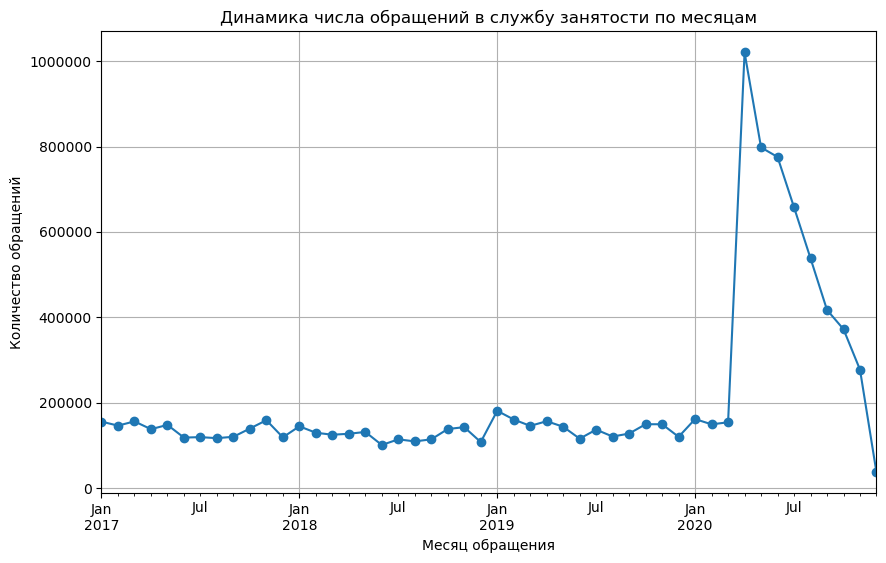

In [16]:
plt.ticklabel_format(style='plain')#для понятного отображения количества обращений

month_app.plot(title='Динамика числа обращений в службу занятости по месяцам',
               style='o-',
               grid=True,
               figsize=(10, 6),
               ylabel='Количество обращений',
               xlabel='Месяц обращения')

plt.show()

In [17]:
year_app = df.groupby('year')['count'].sum()
year_app

year
2017    1636951
2018    1486266
2019    1708623
2020    5358366
Name: count, dtype: int64

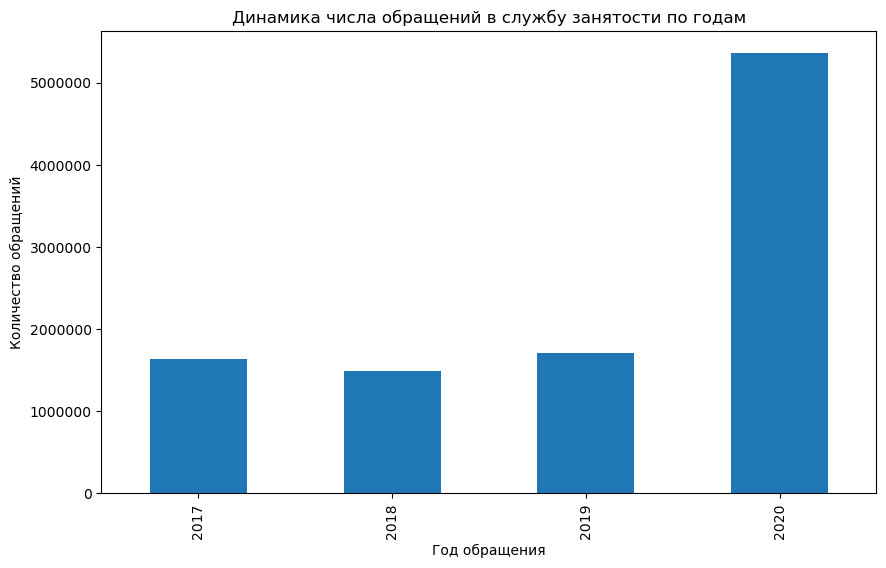

In [18]:
plt.ticklabel_format(style='plain')

year_app.plot(kind='bar',
              title='Динамика числа обращений в службу занятости по годам',
              figsize=(10, 6),
              ylabel='Количество обращений',
              xlabel='Год обращения')

plt.show()

In [19]:
dynamic_recc = pd.merge(df.groupby('year')['count'].sum(), 
                        df[df['hc_repeat'] == True].groupby('year')['count'].sum(),
                        right_index = True,
                        left_index = True)

dynamic_recc.columns = ['Общее количество обращений', 'Количество повторных обращений']
dynamic_recc

,Общее количество обращений,Количество повторных обращений
year,,
2017,1636951,860703
2018,1486266,796277
2019,1708623,912457
2020,5358366,1945859


In [20]:
import seaborn as sns

plt.rcParams['figure.figsize'] = (11, 7)

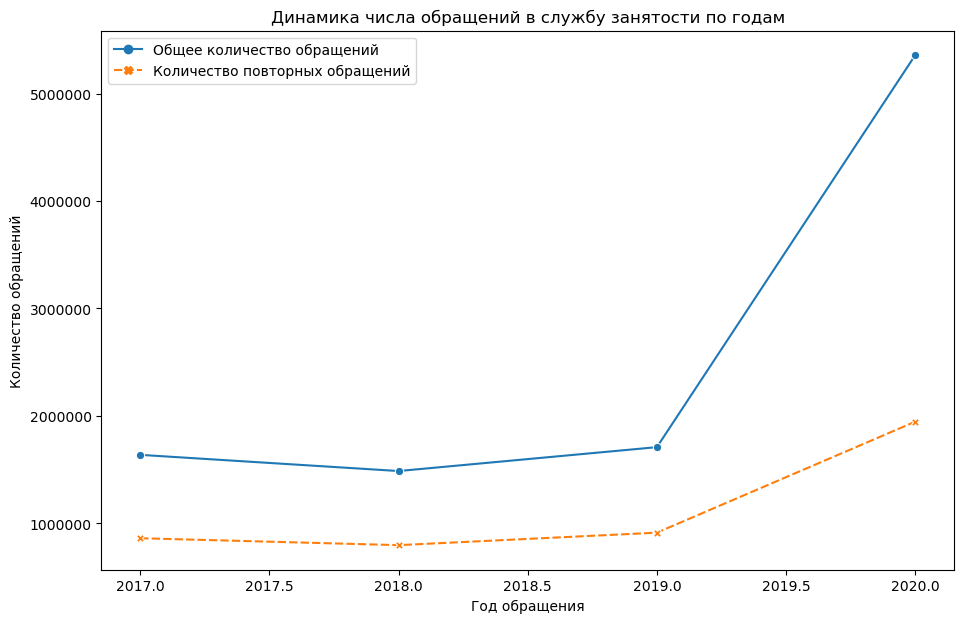

In [21]:
plt.ticklabel_format(style='plain')
sns.lineplot(data=dynamic_recc,
             markers=True).set(title='Динамика числа обращений в службу занятости по годам',
                               xlabel='Год обращения',
                               ylabel='Количество обращений')
plt.show()

# Выводы
1. Согласно данным, в 2020 году произошло рекордное количество обращений в службу занятости: 5 358 371.
2. Исходя из детализации динамики по месяцам пик обращений пришёлся на 2 квартал 2020 года.
3. Подобный всплеск можно объяснить коронавирусной пандемией в России и массовой потерей населением рабочих мест.

# Задание 2.
Определите число обращений в службу занятости по возрастным группам. Постройте столбчатую диаграмму.

In [22]:
age_app = df.groupby('age')['count'].sum()
age_app

age
16-21     642895
22-27    1314197
28-33    2001622
34-39    1963617
40-45    1580491
46-51    1325802
52-57    1066379
58-60     295203
Name: count, dtype: int64

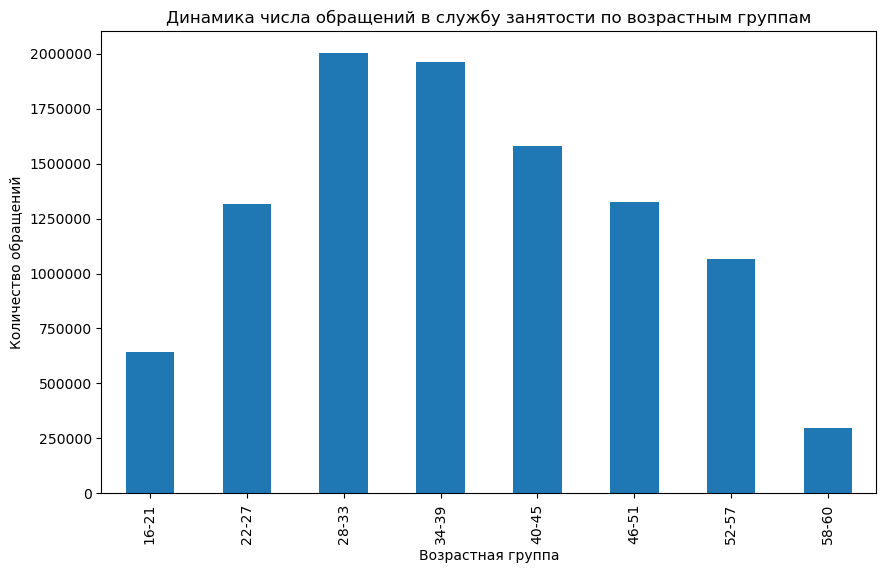

In [23]:
plt.ticklabel_format(style='plain')

age_app.plot(kind='bar',
             title='Динамика числа обращений в службу занятости по возрастным группам',
             figsize=(10, 6),
             ylabel='Количество обращений',
             xlabel='Возрастная группа')

plt.show()

# Задание 2.1.
Детализируйте по каждому году, визуализируйте результат.

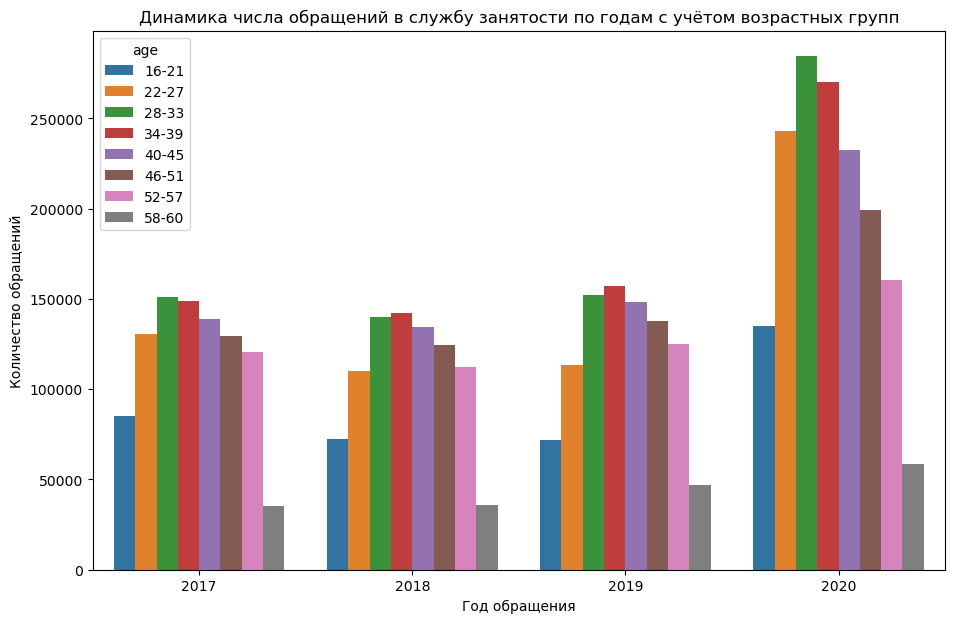

In [24]:
df_age_sorted = df.sort_values(by='age')#сортировка для лучшей читабельности графика
sns.countplot(data=df_age_sorted,
              x='year',
              order=df.groupby('year')['count'].sum().index,
              hue='age').set(title='Динамика числа обращений в службу занятости по годам с учётом возрастных групп',
                             xlabel='Год обращения', 
                             ylabel='Количество обращений')

plt.show()

# Выводы
1. В 2020 году количество обращений увеличилось во всех возрастных группах, в то время как в предыдущие годы количество обращений соответствующих групп находилось примерно на одном уровне.
2. Больше всего в службу занятости обращаются люди в возрасте 28-33 и 34-39 лет.

# Задание 3.
Определите общее число устроившихся на работу граждан, определите процент трудоустройства по всему датасету. Постройте столбчатую диаграмму.

In [25]:
#т.к. по одному числу устроившихся граждан не составить нормальную столбчатую диаграмму (она бы состояла из одного столбца),
#то было принято решение на диаграмме рассмотреть данный аспект через призму федеральных округов

new_job_district_app = df[df['find_new_job'] == True].groupby('district')['count'].sum() 
new_job_district_app

district
Дальневосточный федеральный округ      211718
Приволжский федеральный округ          769378
Северо-Западный федеральный округ      320249
Северо-Кавказский федеральный округ    201192
Сибирский федеральный округ            690219
Уральский федеральный округ            322433
Центральный федеральный округ          736419
Южный федеральный округ                325059
Name: count, dtype: int64

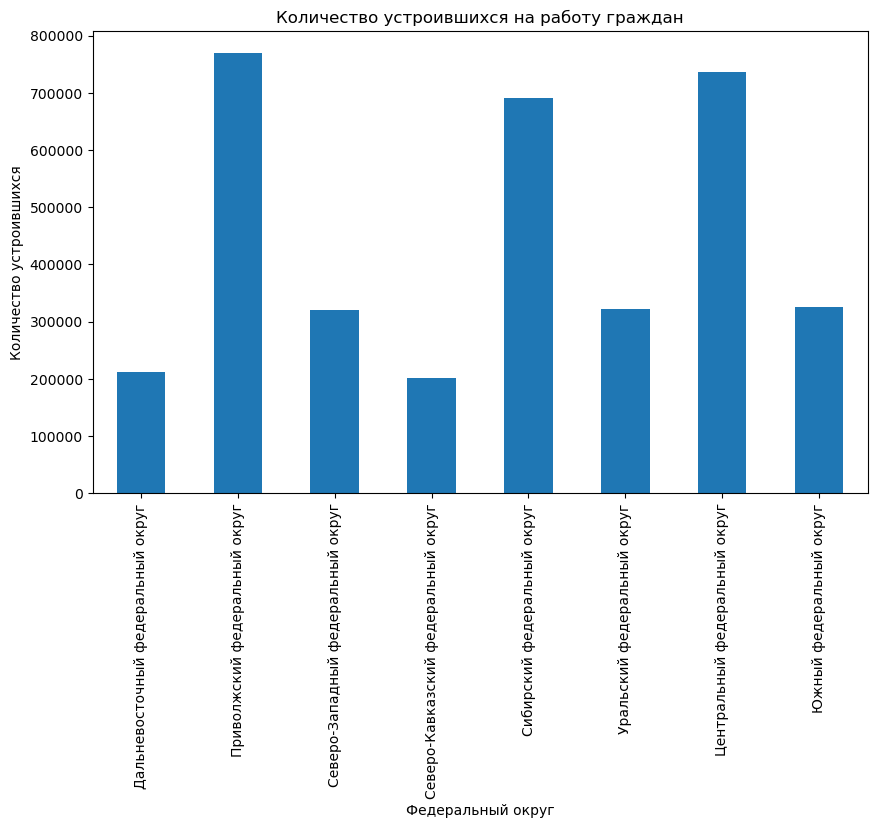

In [26]:
new_job_district_app.plot(kind='bar',
                          title='Количество устроившихся на работу граждан',
                          figsize=(10, 6),
                          ylabel='Количество устроившихся',
                          xlabel='Федеральный округ')

plt.show()

In [27]:
new_job_district_app_perc = df.groupby('district')['count'].sum().mul(1/df.groupby('district')['count'].sum().sum())
new_job_district_app_perc

district
Дальневосточный федеральный округ      0.064391
Приволжский федеральный округ          0.195307
Северо-Западный федеральный округ      0.091280
Северо-Кавказский федеральный округ    0.121118
Сибирский федеральный округ            0.148980
Уральский федеральный округ            0.092306
Центральный федеральный округ          0.185911
Южный федеральный округ                0.100706
Name: count, dtype: float64

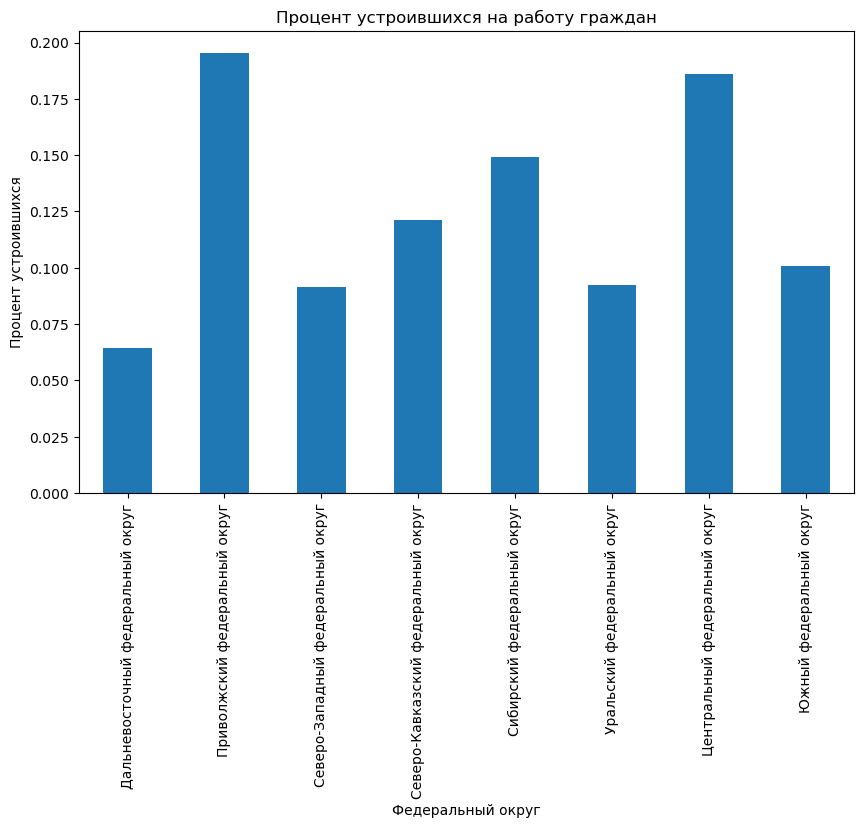

In [28]:
new_job_district_app_perc.plot(kind='bar',
                               title='Процент устроившихся на работу граждан',
                               figsize=(10, 6),
                               ylabel='Процент устроившихся',
                               xlabel='Федеральный округ')

plt.show()

In [29]:
print('Общее число устроившихся на работу граждан по всему датасету:', df[df['find_new_job'] == True]['count'].sum())
print(f"Процент трудоустройства по всему датасету составляет {round(df[df['find_new_job'] == True]['count'].sum() / df['count'].sum() * 100, 2)}%")

Общее число устроившихся на работу граждан по всему датасету: 3576667
Процент трудоустройства по всему датасету составляет 35.1%


# Выводы
1. Больше всего устроившихся на работу граждан проживает в Приволжском, Центральном и Сибирском федеральных округах

# Задание 4.
Определите соотношение трудоустройства по каждому году (в абсолютных значениях). Постройте столбчатую диаграмму.

In [30]:
new_job_per_year_app = df[df['find_new_job'] == True].groupby('year')['count'].sum()
new_job_per_year_app

year
2017     875769
2018     789670
2019     813881
2020    1097347
Name: count, dtype: int64

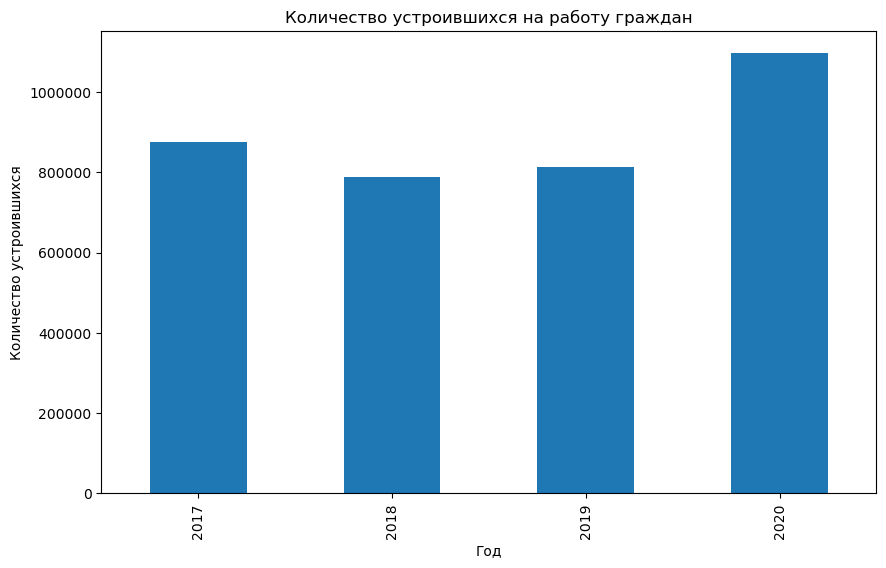

In [31]:
plt.ticklabel_format(style='plain')
new_job_per_year_app.plot(kind='bar',
                          title='Количество устроившихся на работу граждан',
                          figsize=(10, 6),
                          ylabel='Количество устроившихся',
                          xlabel='Год')

plt.show()

# Задание 4.1.
Выполните в относительных значениях, оцените динамику процента трудоустройства по годам.

In [32]:
new_job_per_year_app_perc = df[df['find_new_job'] == True].groupby('year')['count'].sum().mul(1/df[df['find_new_job'] == True].groupby('year')['count'].sum().sum())
new_job_per_year_app_perc

year
2017    0.244856
2018    0.220784
2019    0.227553
2020    0.306807
Name: count, dtype: float64

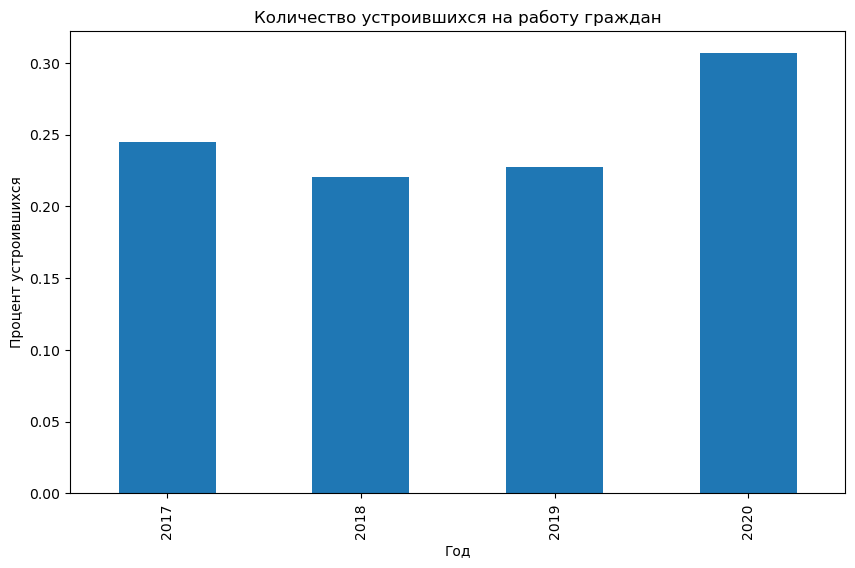

In [33]:
new_job_per_year_app_perc.plot(kind='bar',
                               title='Количество устроившихся на работу граждан',
                               figsize=(10, 6),
                               ylabel='Процент устроившихся',
                               xlabel='Год')

plt.show()

# Выводы
1. Процент устроившихся на работу граждан за 2017, 2018 и 2019 года держался примерно на одном уровне (22-24%).
2. В 2020 году количество и процент устроившихся на работу граждан повысились до 1 097 348 и 30.68% соответственно.

# Задание 5.

Осуществите категоризацию по столбцам gender и education в соответствии с исходными данными. Определите с каким образованием в службу занятости обращаются гражданине, ранее официально не работавшие. Определите соотношение трудоустройства по каждому уровню образования.

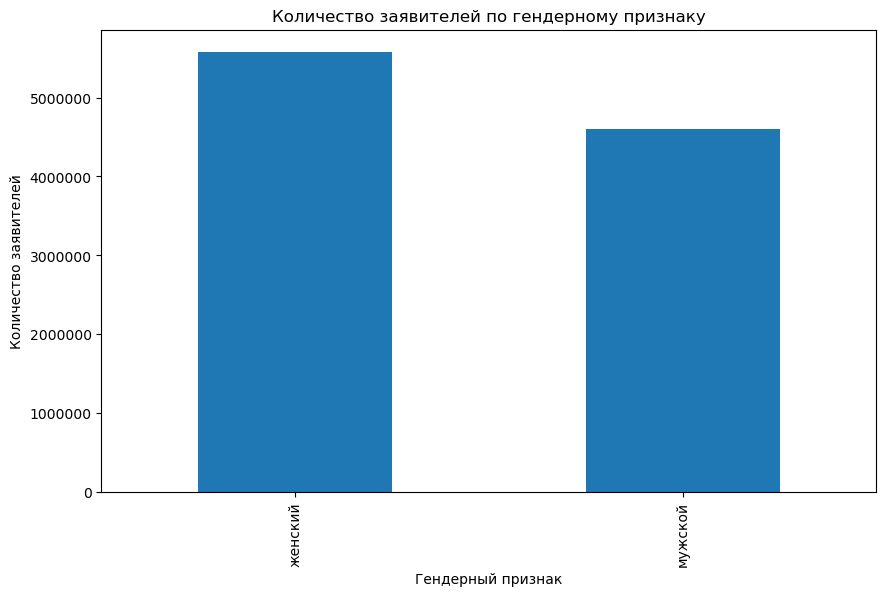

In [34]:
gender_app = df.groupby('gender')['count'].sum()

plt.ticklabel_format(style='plain')
gender_app.plot(kind='bar',
                title='Количество заявителей по гендерному признаку',
                figsize=(10, 6),
                ylabel='Количество заявителей',
                xlabel='Гендерный признак')

plt.show()

In [35]:
dict_education = {1: 'начальное общее образование',
                  2: 'основное общее образование',
                  3: 'среднее общее образование',
                  4: 'среднее профессиональное образование',
                  6: 'высшее образование',
                  9: 'другое',
                  0: 'нет данных'}

In [36]:
education_app = pd.DataFrame(df.groupby('education')['count'].sum()).reset_index()
education_app['education'] = education_app['education'].map(dict_education)
education_app.set_index('education', inplace=True)

In [37]:
education_app

,count
education,
нет данных,2138099
начальное общее образование,7866
основное общее образование,1431099
среднее общее образование,2174286
среднее профессиональное образование,2555968
высшее образование,1561036
другое,321852


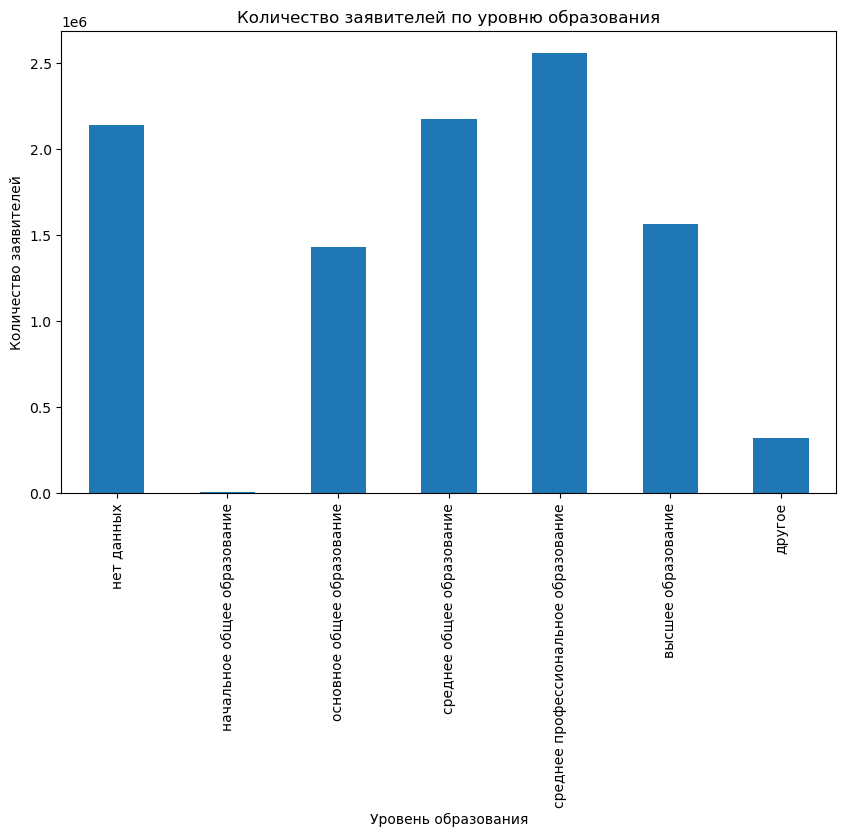

In [38]:
education_app.plot(kind='bar',
                title='Количество заявителей по уровню образования',
                figsize=(10, 6),
                ylabel='Количество заявителей',
                xlabel='Уровень образования').get_legend().remove()

plt.show()

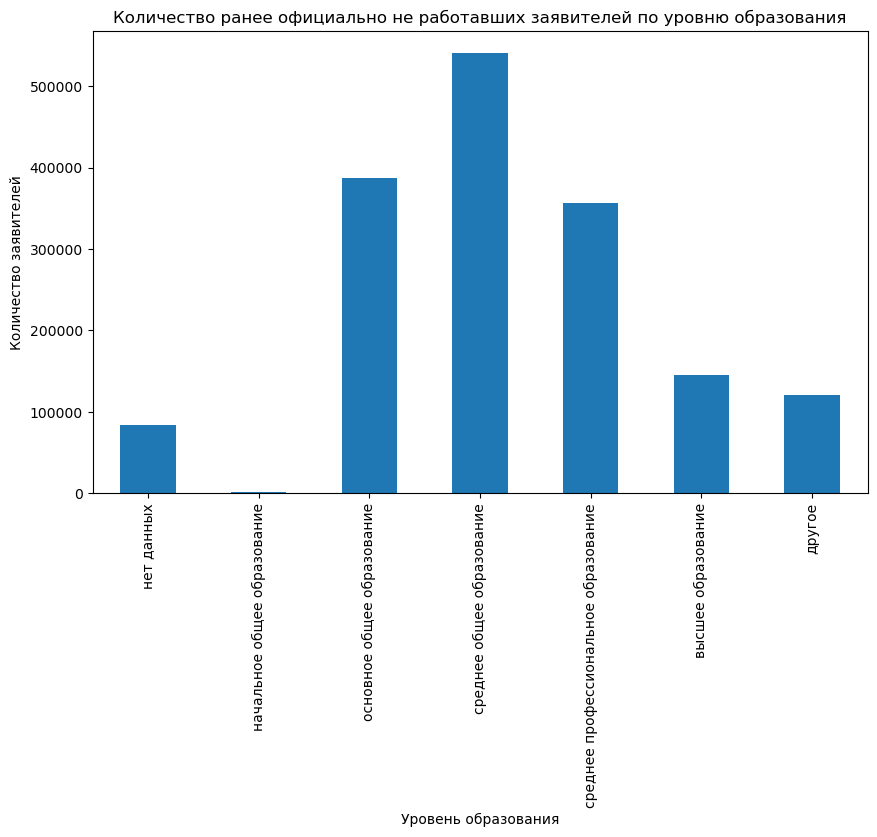

In [39]:
education_didnotwork_app = pd.DataFrame(df[df['hc_didnotwork'] == True].groupby('education')['count'].sum()).reset_index()
education_didnotwork_app['education'] = education_didnotwork_app['education'].map(dict_education)
education_didnotwork_app.set_index('education', inplace=True)


education_didnotwork_app.plot(kind='bar',
                              title='Количество ранее официально не работавших заявителей по уровню образования',
                              figsize=(10, 6),
                              ylabel='Количество заявителей',
                              xlabel='Уровень образования').get_legend().remove()

plt.show()

In [40]:
education_findnewjob_app_comparison = pd.merge(df[df['find_new_job'] == True].groupby('education')['count'].sum(), 
                                               df[df['find_new_job'] == False].groupby('education')['count'].sum(),
                                               right_index = True,
                                               left_index = True)

education_findnewjob_app_comparison.columns = ['Количество трудоустроившихся', 'Количество нетрудоустроившихся']
education_findnewjob_app_comparison

,Количество трудоустроившихся,Количество нетрудоустроившихся
education,,
0,717324,1420775
1,2052,5814
2,440462,990637
3,640822,1533464
4,1025953,1530015
6,674239,886797
9,75815,246037


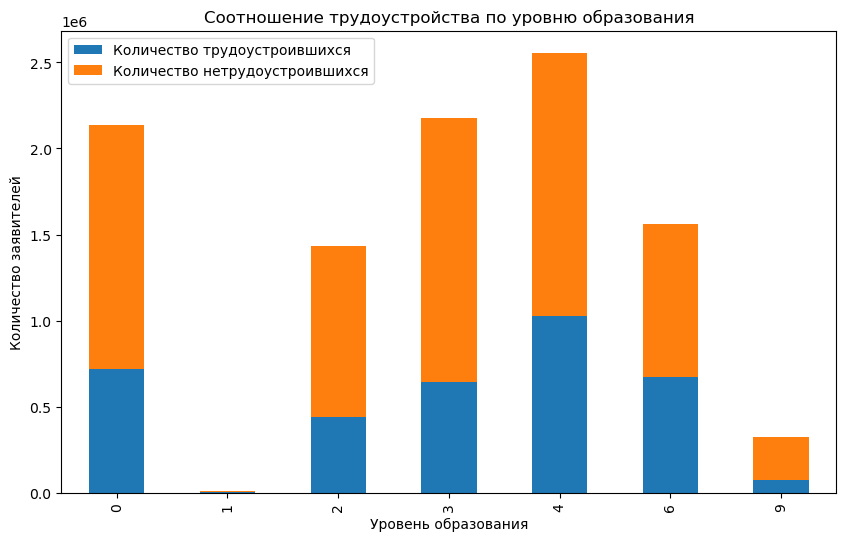

In [41]:
education_findnewjob_app_comparison.plot(kind='bar',
                                         stacked=True,
                                         title='Соотношение трудоустройства по уровню образования',
                                         figsize=(10, 6),
                                         ylabel='Количество заявителей',
                                         xlabel='Уровень образования')

plt.show()

# Выводы

1. За рассматриваемый период количество заявок со стороны женщин превышает количество заявок со стороны мужчин примерно на 1 млн.
2. Больше всего заявителей имеют среднее профессиональное образование, на 2 месте — среднее общее образование, на 3 месте — заявители, уровень образования которых неизвестен.
3. Заявители, ранее не имевшие официальную работу, в большинстве своём имеют среднее общее образование. На 2 месте — основное общее образование, на 3 месте — среднее профессиональное образование.
4. Количество нетрудоустроившихся в каждой группе больше, чем количество трудоустроившихся.
5. Топ-3 группы по количеству трудоустроившихся по уровню образования: среднее профессиональное образование (1 025 953 человек), нет данных (717 325 человек) и высшее образование (674 240 человек).

# Задание 6.

Исследуйте безработицу в России отдельно за 2000 год (за исключением декабря 2020!). Создайте срез данных.

# Задание 6.1.

Определите динамику числа безработных и нашедших работу за 2020 год по месяцам.

In [42]:
last_year_app = df.query('year == 2020 and month != 12')

In [43]:
findnewjob_app_comparison = pd.merge(last_year_app[last_year_app['find_new_job'] == True].groupby('month')['count'].sum(),
                                     last_year_app[last_year_app['find_new_job'] == False].groupby('month')['count'].sum(),
                                     right_index = True,
                                     left_index = True)

findnewjob_app_comparison.columns = ['Трудоустроенные', 'Безработные']
findnewjob_app_comparison

,Трудоустроенные,Безработные
month,,
1,63615,98098
2,53040,96326
3,49817,104349
4,299564,720765
5,220721,577112
6,153530,622049
7,112190,545431
8,73088,465066
9,43106,374197


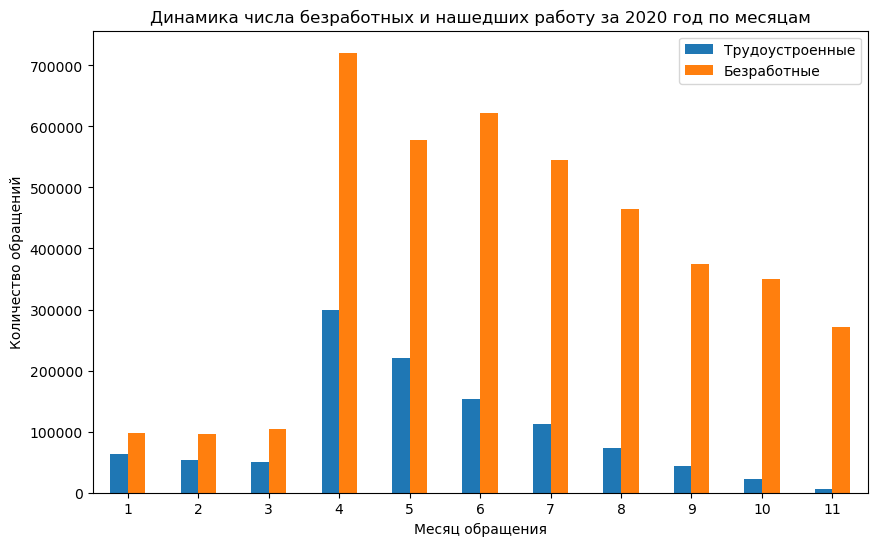

In [44]:
findnewjob_app_comparison.plot(kind='bar',
                               title='Динамика числа безработных и нашедших работу за 2020 год по месяцам',
                               figsize=(10, 6),
                               ylabel='Количество обращений',
                               xlabel='Месяц обращения')

plt.xticks(rotation=0)#для корректного отображения подписей по оси x
plt.show()

# Выводы
1. В каждый отрезок времени количество безработных больше количества нашедших работу.
2. Наибольшее число трудоустроившихся приходится на апрель.
3. Именно в апреле происходит резкий скачок количества нашедших работу. Впоследствии это количество постепенно снижается
4. Количество безработных также резко повышается в апреле, но не характеризуется таким же быстрым понижением к концу года. Иными словами, после апреля 2020 года с каждым месяцам уменьшается процент трудоустройства в общем количестве заявок.

# Задание 6.2.

Определите процент трудоустройства по гендерной принадлежности

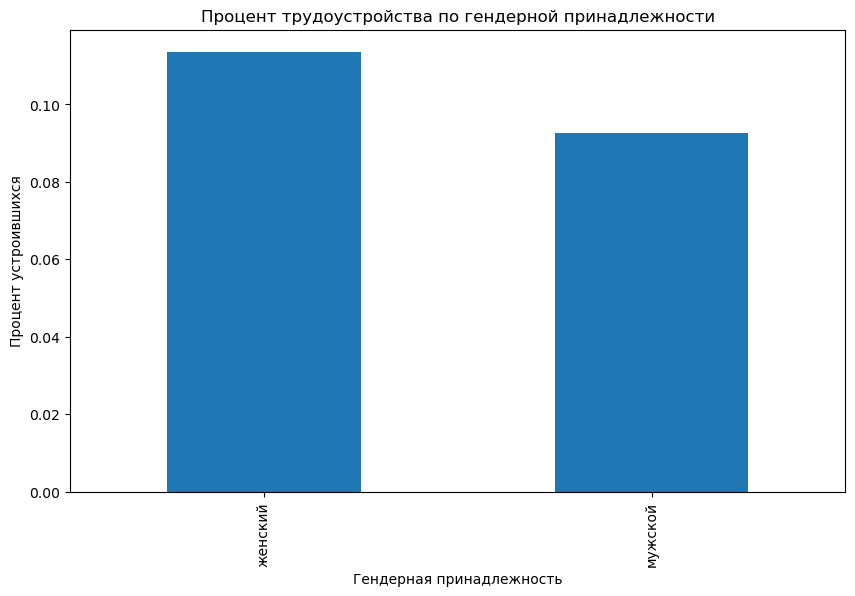

In [45]:
findnewjob_per_gender = last_year_app[last_year_app['find_new_job'] == True].groupby('gender')['count'].sum().mul(1/last_year_app.groupby('gender')['count'].sum().sum())

findnewjob_per_gender.plot(kind='bar',
                           title='Процент трудоустройства по гендерной принадлежности',
                           figsize=(10, 6),
                           ylabel='Процент устроившихся',
                           xlabel='Гендерная принадлежность')

plt.show()

# Выводы

1. Процент трудоустройства женщин превышает процент трудоустройства мужчин примерно на 2%

# Задание 6.3.

Определите число обращений в службу занятости по федеральным округам.

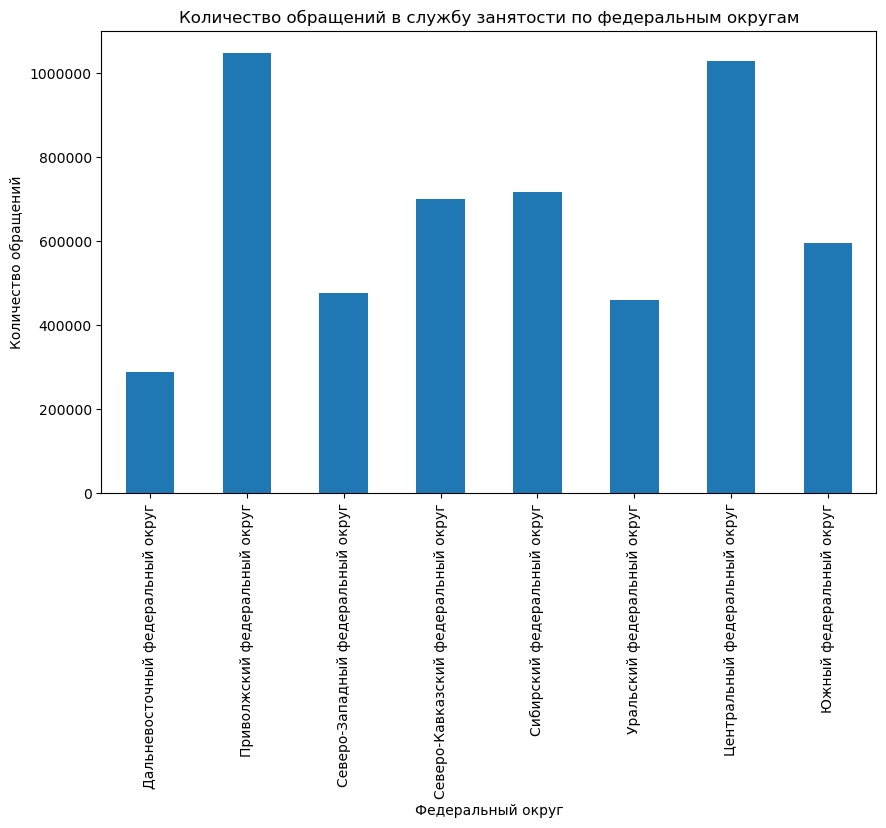

In [46]:
district_app = last_year_app.groupby('district')['count'].sum()

plt.ticklabel_format(style='plain')
district_app.plot(kind='bar',
                  title='Количество обращений в службу занятости по федеральным округам',
                  figsize=(10, 6),
                  ylabel='Количество обращений',
                  xlabel='Федеральный округ')

plt.show()

# Выводы
1. Больше всего обращений в службу занятости было зарегистрировано в Приволжском и Центральном федеральных округах.
2. Меньше всего обращений в службу занятости было зарегистрировано в Дальневосточном федеральном округе.

# Задание 6.4.

Определите разброс числа объявлений по регионам с помощью boxplot.

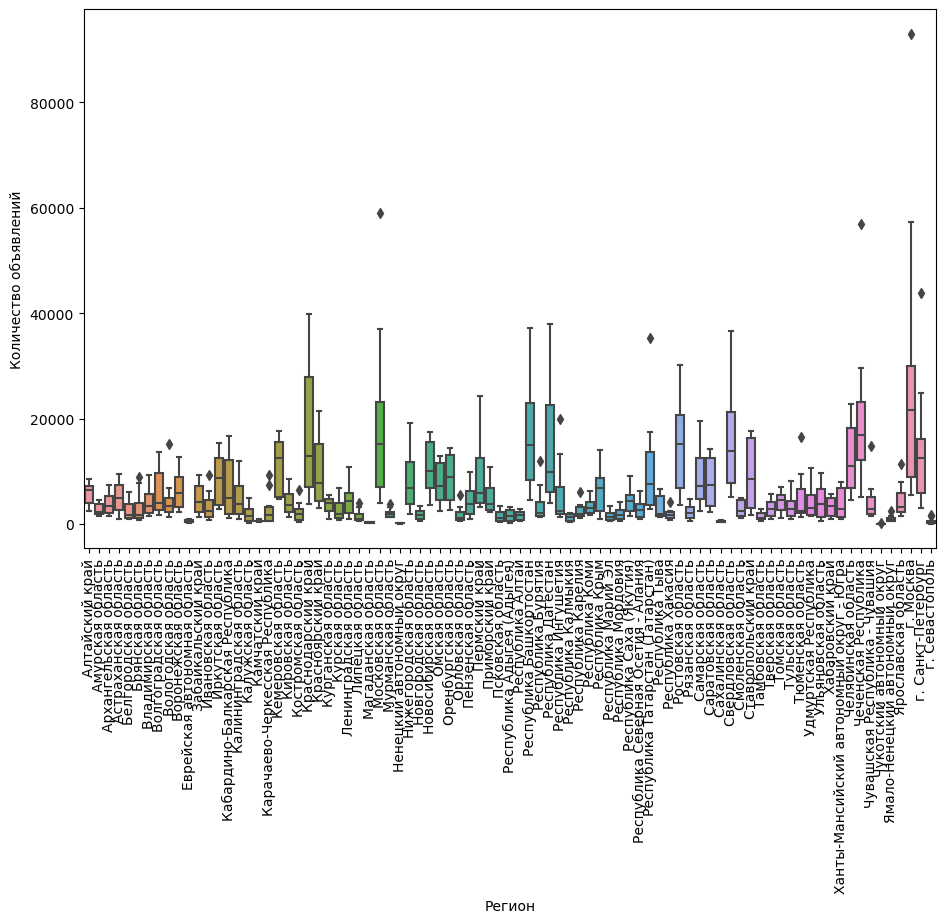

In [47]:
ax = pd.DataFrame(last_year_app.groupby(['month','region'])['count'].sum()).reset_index()
ax.columns = ['month', 'region', 'count']

sns.boxplot(data=ax, x='region', y='count').set(xlabel='Регион', ylabel='Количество объявлений')
plt.xticks(rotation=90)
plt.show()

# Выводы
1. Наибольший разброс числа объявлений наблюдается в Москве.

# Задание 6.5.

Определите число обращений в службу занятости в Северо-Западном федеральном округе по регионам.

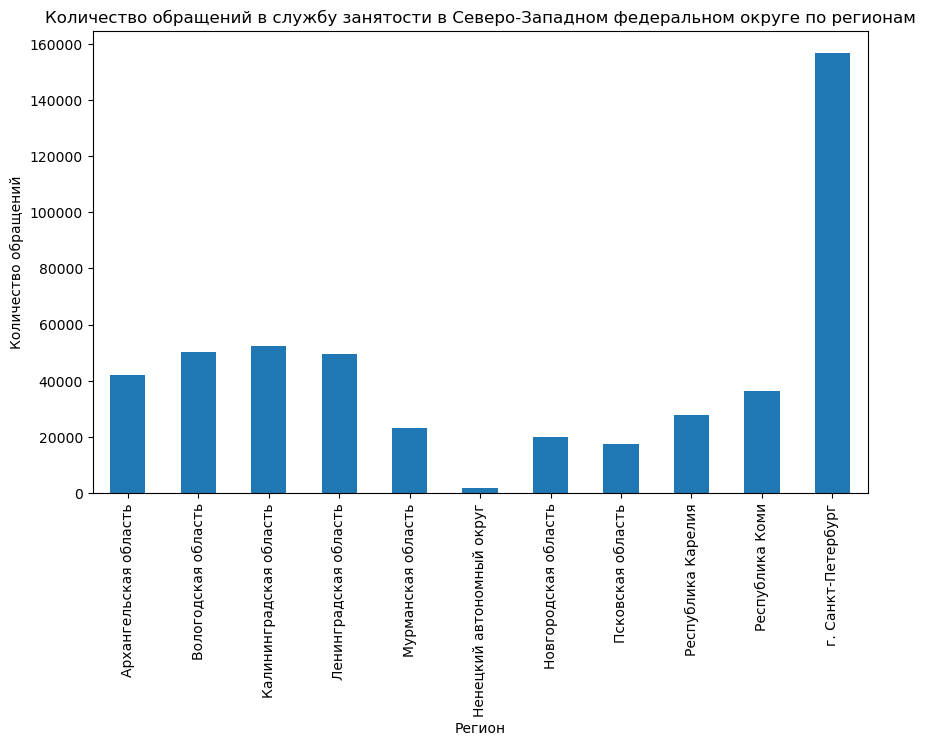

In [48]:
SZ_regions_app = last_year_app[last_year_app['district'] == 'Северо-Западный федеральный округ'].groupby('region')['count'].sum()

plt.ticklabel_format(style='plain')
SZ_regions_app.plot(kind='bar',
                    title='Количество обращений в службу занятости в Северо-Западном федеральном округе по регионам',
                    figsize=(10, 6),
                    ylabel='Количество обращений',
                    xlabel='Регион')

plt.show()

# Выводы
1. Наибольшее количество обращений в Северо-Западном федеральном округе наблюдается в г. Санкт-Петербурге, что объясняется численностью населения города и желанием населения работать в административном центре Северо-Западного федерального округа из-за различия зарплат по сравнению с другими регионами.
2. Наименьшее количество обращений наблюдается в Ненецком автономном округе, что объясняется низкой численностью населения и неблагоприятным климатом.

# Задание 6.6.

Определите процент трудоустройства по федеральным округам.

In [49]:
new_job_district_app_perc = pd.DataFrame(last_year_app.groupby(['district','find_new_job'])['count'].sum())
new_job_district_app_perc['perc'] = round(new_job_district_app_perc['count'] / new_job_district_app_perc.groupby('district')['count'].transform('sum') * 100, 2)
new_job_district_app_perc

count   perc
district                            find_new_job               
Дальневосточный федеральный округ   False         235005  81.25
                                    True           54219  18.75
Приволжский федеральный округ       False         796807  75.99
                                    True          251729  24.01
Северо-Западный федеральный округ   False         372518  77.97
                                    True          105280  22.03
Северо-Кавказский федеральный округ False         660967  94.25
                                    True           40358   5.75
Сибирский федеральный округ         False         535995  74.64
                                    True          182080  25.36
Уральский федеральный округ         False         368422  79.88
                                    True           92800  20.12
Центральный федеральный округ       False         767625  74.56
                                    True          261956  25.44
Южный федеральный округ             False         487177  81.76
                                    True          108717  18.24

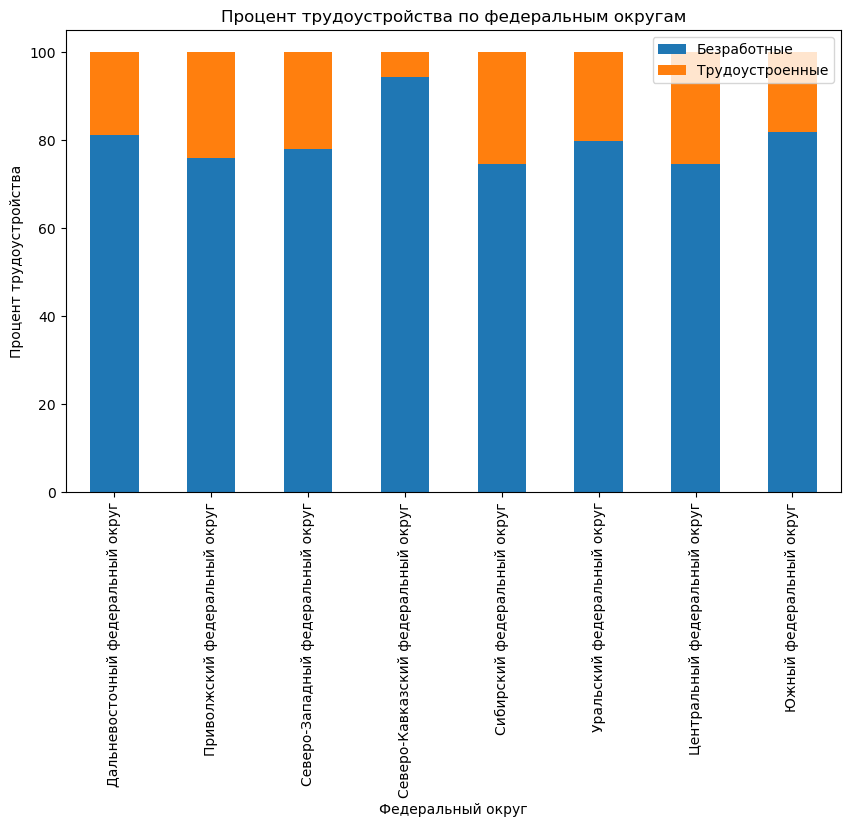

In [50]:
new_job_district_app_perc.unstack(level=1).plot(kind='bar',
                                                y='perc',
                                                stacked=True,
                                                title='Процент трудоустройства по федеральным округам',
                                                figsize=(10, 6),
                                                ylabel='Процент трудоустройства',
                                                xlabel='Федеральный округ')

plt.legend(title='', labels=['Безработные', 'Трудоустроенные'])
plt.show()

# Выводы
1. Наибольший процент трудоустройства наблюдается в Приволжском, Сибирском и Центральном федеральных округах.

# Задание 6.7.

Определите процент трудоустройства по регионам для каждого федерального округа. Реализуйте в цикле

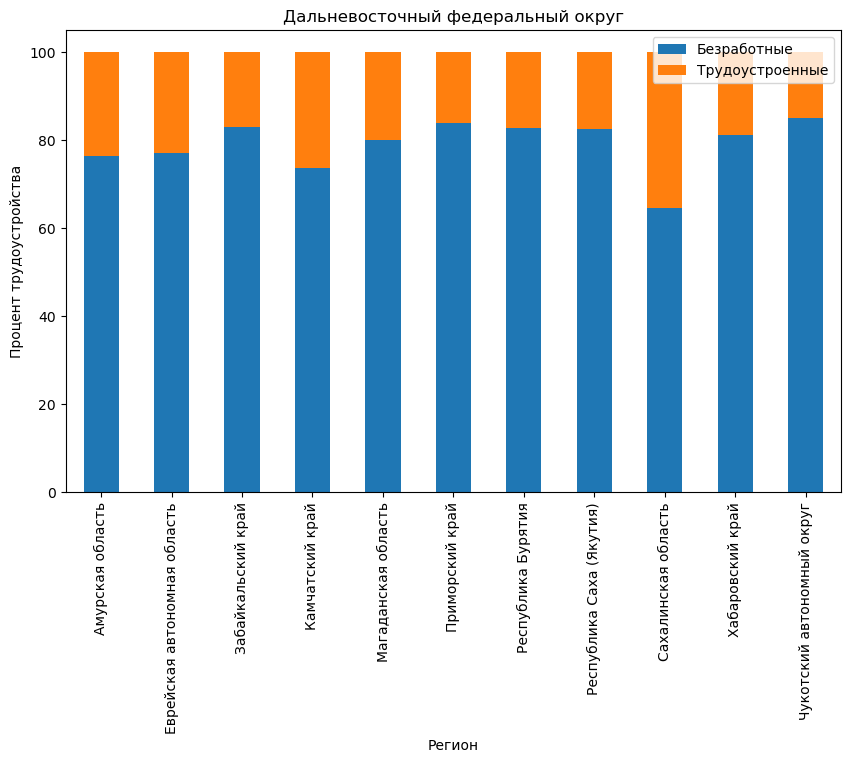

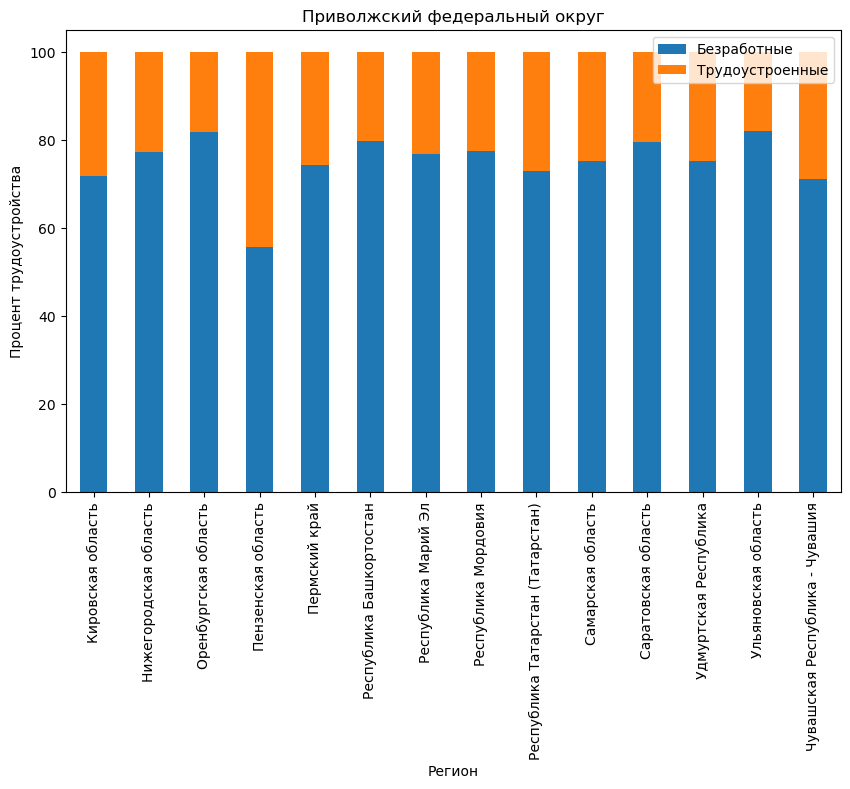

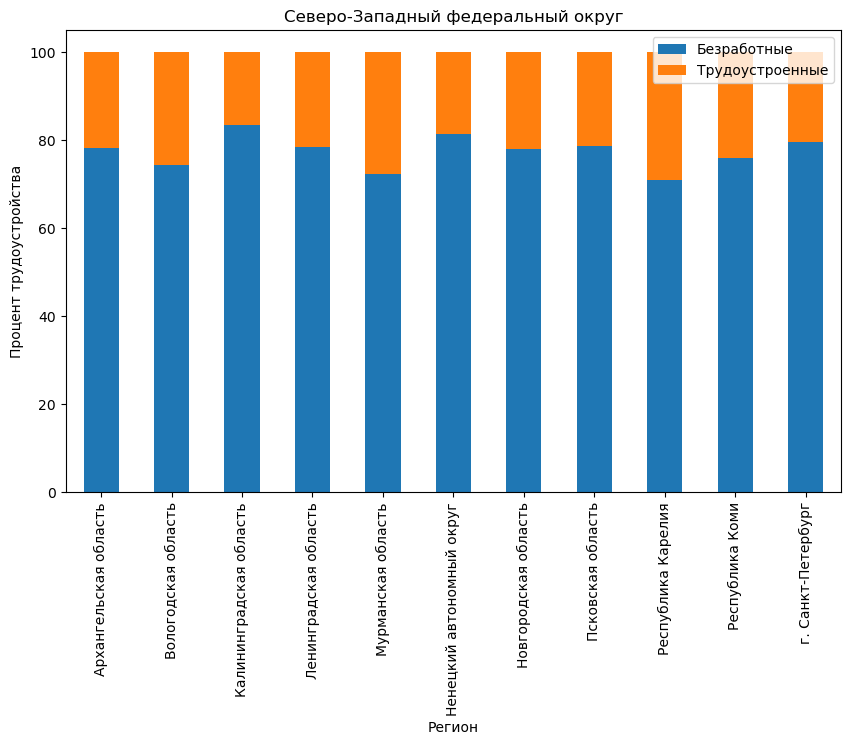

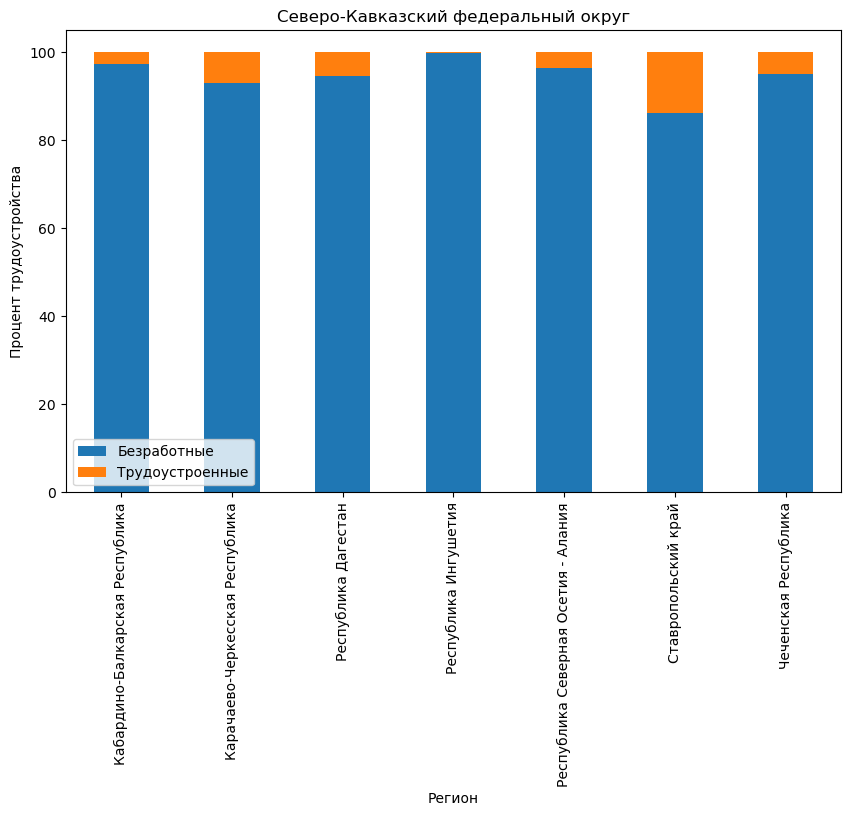

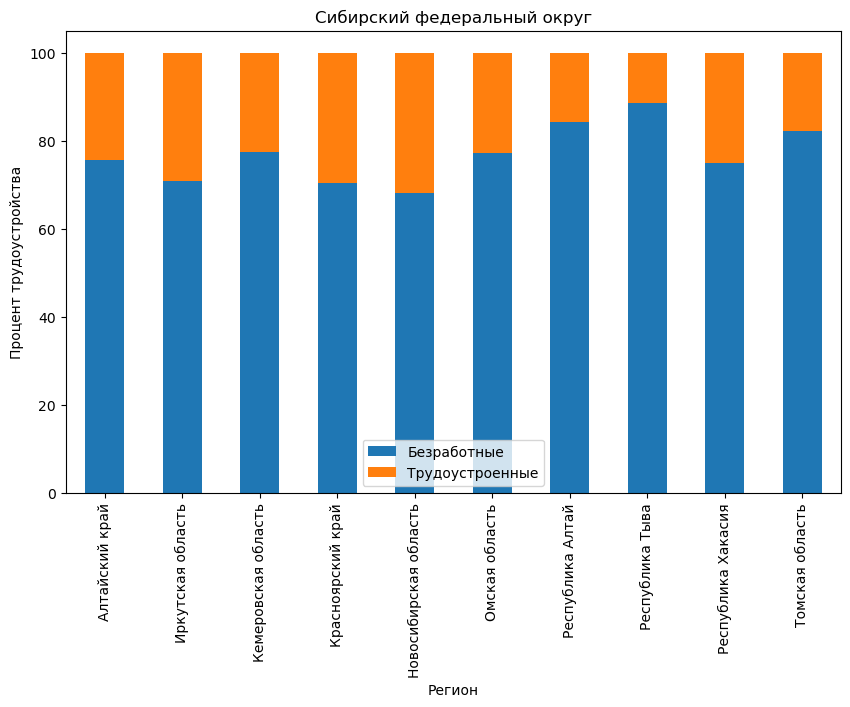

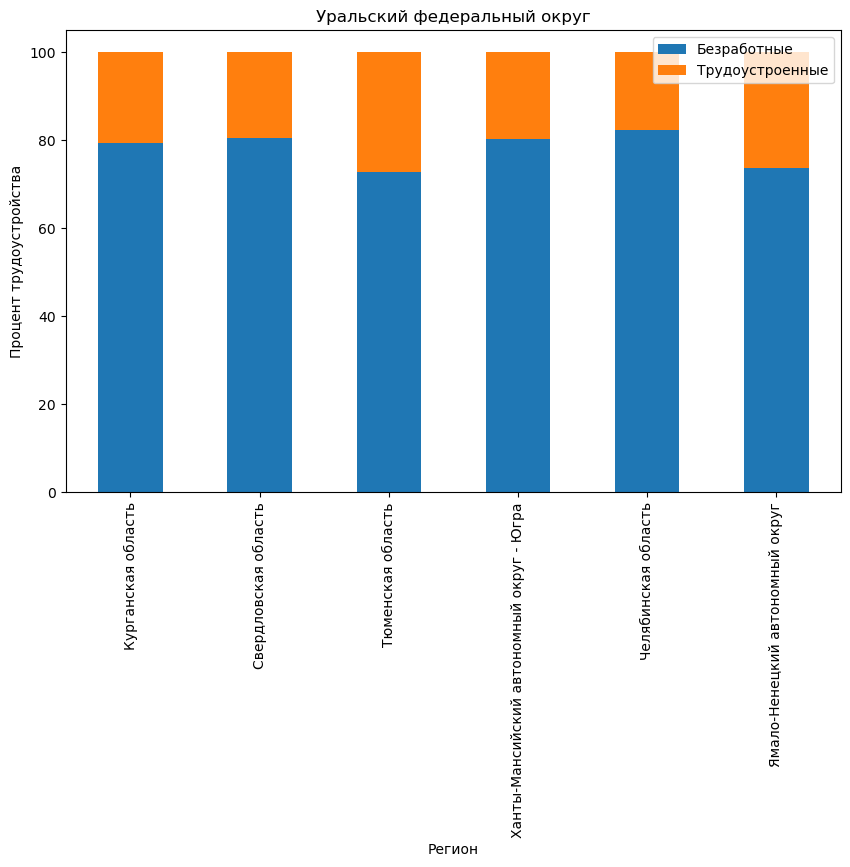

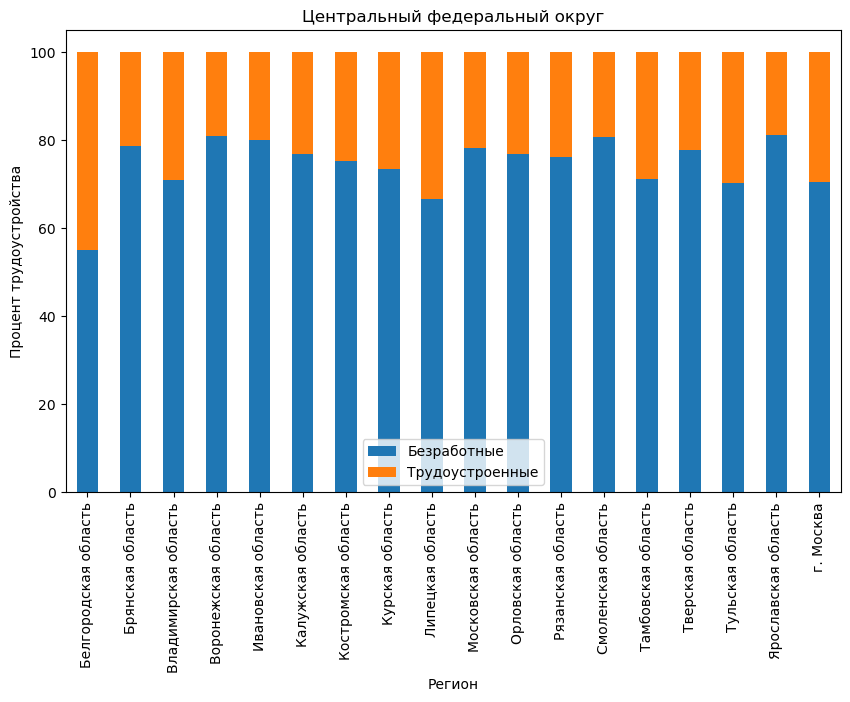

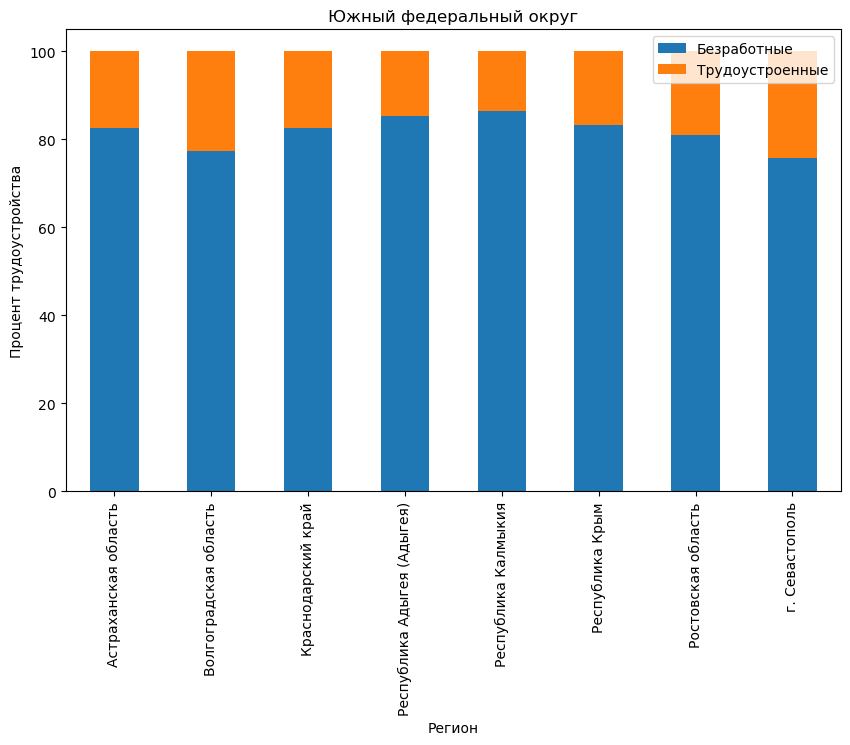

In [51]:
for i in df['district'].unique():   
    new_job_district_app_perc = pd.DataFrame(last_year_app[last_year_app['district'] == i].groupby(['region','find_new_job'])['count'].sum())
    new_job_district_app_perc['perc'] = round(new_job_district_app_perc['count'] / new_job_district_app_perc.groupby('region')['count'].transform('sum') * 100, 2)
    
    new_job_district_app_perc.unstack(level=1).plot(kind='bar',
                                                y='perc',
                                                stacked=True,
                                                title=i,
                                                figsize=(10, 6),
                                                ylabel='Процент трудоустройства',
                                                xlabel='Регион')

    plt.legend(title='', labels=['Безработные', 'Трудоустроенные'])
    plt.show()

# Вывод
### Лидеры федеральных округов по проценту трудоустройства
    
- Дальневосточный федеральный округ - Сахалинская область
- Приволжский федеральный округ - Пензенская область
- Северо-Западный федеральный округ - Республика Карелия
- Северо-Кавказский федеральных округ - Чеченская Республика
- Сибирский федеральный округ - Ставропольский край
- Уральский федеральный округ - Тюменская область
- Центральный федеральный округ - Белгородская область
- Южный федеральный округ - г. Севастополь